In [ ]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Customer Churn.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


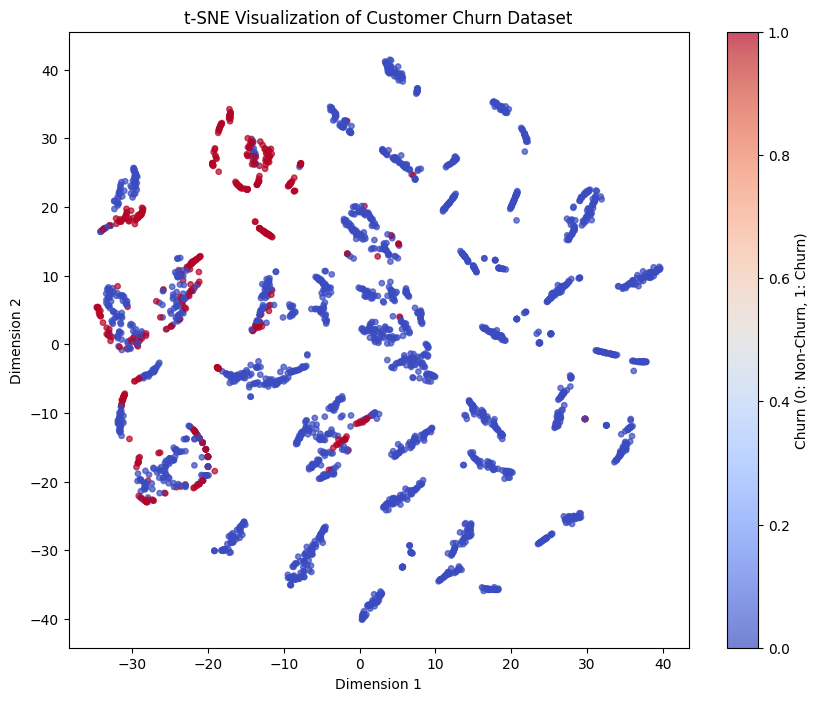

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Selecting relevant numerical columns for t-SNE
numerical_columns = [
    'Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
    'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
    'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
    'Customer Value'
]
data_numerical = data[numerical_columns]

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
tsne_result = tsne.fit_transform(data_scaled)

# Creating a DataFrame for t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Churn'] = data['Churn']

# Plotting the t-SNE result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'],
                       c=tsne_df['Churn'], cmap='coolwarm', s=15, alpha=0.7)
plt.colorbar(scatter, label='Churn (0: Non-Churn, 1: Churn)')
plt.title("t-SNE Visualization of Customer Churn Dataset")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


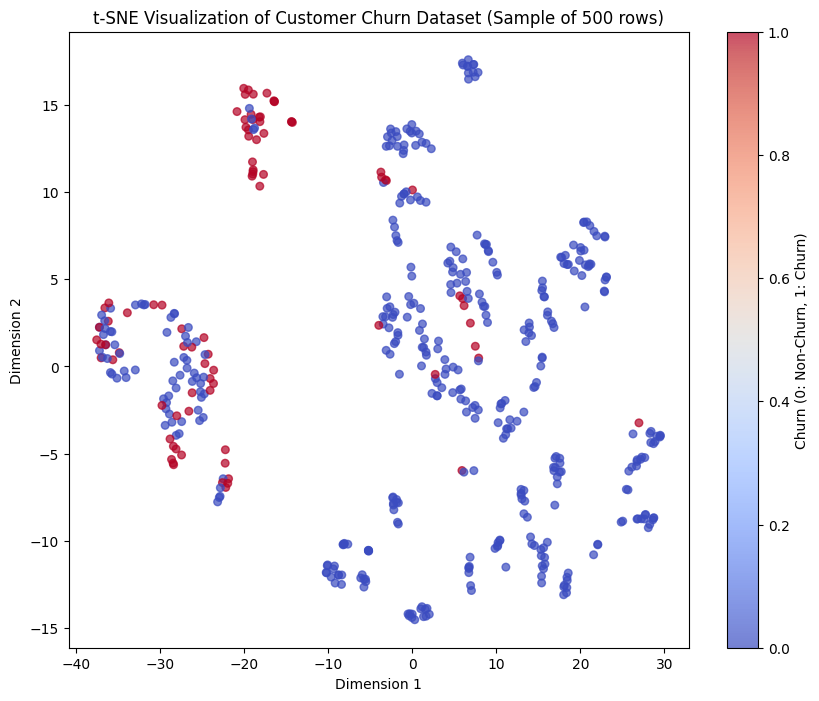

In [ ]:
# Reducing the dataset size for faster computation
data_sample = data.sample(n=500, random_state=42)  # Sampling 500 rows
data_sample_scaled = scaler.fit_transform(data_sample[numerical_columns])

# Applying t-SNE on the smaller sample
tsne_sample = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
tsne_result_sample = tsne_sample.fit_transform(data_sample_scaled)

# Creating a DataFrame for the sampled t-SNE results
tsne_sample_df = pd.DataFrame(tsne_result_sample, columns=['Dimension 1', 'Dimension 2'])
tsne_sample_df['Churn'] = data_sample['Churn'].values

# Plotting the t-SNE result for the sampled data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_sample_df['Dimension 1'], tsne_sample_df['Dimension 2'],
                       c=tsne_sample_df['Churn'], cmap='coolwarm', s=30, alpha=0.7)
plt.colorbar(scatter, label='Churn (0: Non-Churn, 1: Churn)')
plt.title("t-SNE Visualization of Customer Churn Dataset (Sample of 500 rows)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [ ]:
# Re-import necessary libraries after environment reset
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Reapply PCA + t-SNE with corrected imports
pca = PCA(n_components=10, random_state=42)
data_pca = pca.fit_transform(data_sample_scaled)
tsne_pca = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_result_pca = tsne_pca.fit_transform(data_pca)

# Prepare data for modeling
X_tsne = tsne_result_pca  # Features from t-SNE
y = data_sample['Churn']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
accuracy, report


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(0.8933333333333333,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.97      0.94       119\n           1       0.86      0.58      0.69        31\n\n    accuracy                           0.89       150\n   macro avg       0.88      0.78      0.81       150\nweighted avg       0.89      0.89      0.89       150\n')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the trained model on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Non-Churn", "Churn"])

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)


Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.90      0.97      0.94       119
       Churn       0.86      0.58      0.69        31

    accuracy                           0.89       150
   macro avg       0.88      0.78      0.81       150
weighted avg       0.89      0.89      0.89       150



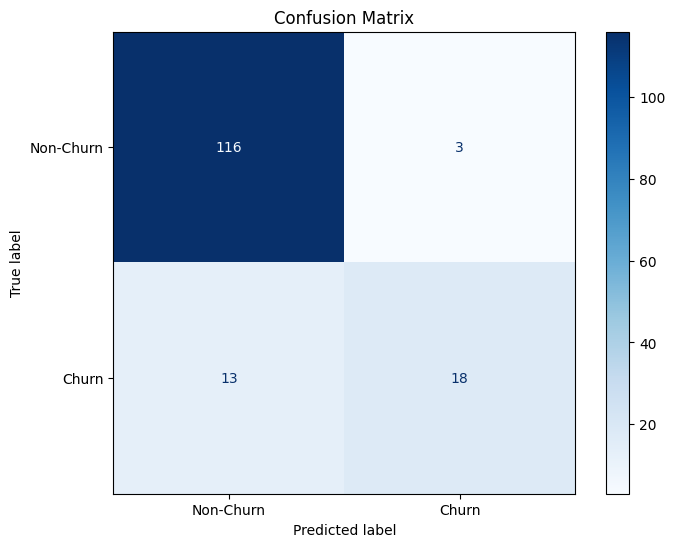

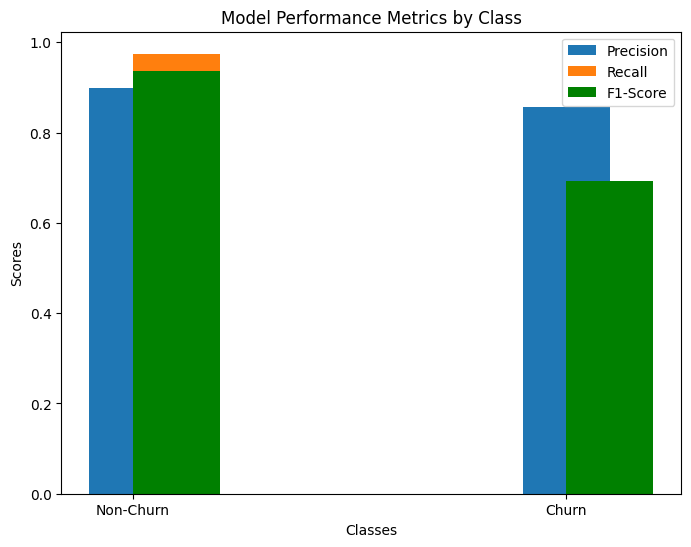

In [ ]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Churn", "Churn"])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Bar chart for Precision, Recall, F1-Score
from sklearn.metrics import precision_recall_fscore_support

# Extracting metrics
metrics = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])
precision, recall, f1_score = metrics[:3]

# Bar plot
labels = ["Non-Churn", "Churn"]
x = range(len(labels))
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, precision, width=0.2, label='Precision', align='center')
ax.bar(x, recall, width=0.2, label='Recall', align='edge')
ax.bar(x, f1_score, width=0.2, label='F1-Score', align='edge', color='green')

# Add labels and legend
ax.set_xlabel("Classes")
ax.set_ylabel("Scores")
ax.set_title("Model Performance Metrics by Class")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()
